In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
milk = pd.read_csv('../Datasets/milk.csv', index_col=0)
std = StandardScaler()
milk_scl = std.fit_transform(milk)

In [13]:
inertia = []
scores = []

for i in range(2,11):
    km = KMeans(random_state=23, n_clusters=i)
    km.fit(milk_scl)
    scores.append([i,silhouette_score(milk_scl, km.labels_)])
    inertia.append([i,km.inertia_])

scores = pd.DataFrame(scores, columns=['neigh','score'])
inertia = pd.DataFrame(inertia, columns=['neigh','inertia'])

scores.sort_values('score', ascending=False)

,neigh,score
1,3,0.539160
0,2,0.525851
2,4,0.440652
4,6,0.424935
8,10,0.419917
3,5,0.411312
7,9,0.406707
6,8,0.376026
5,7,0.372837


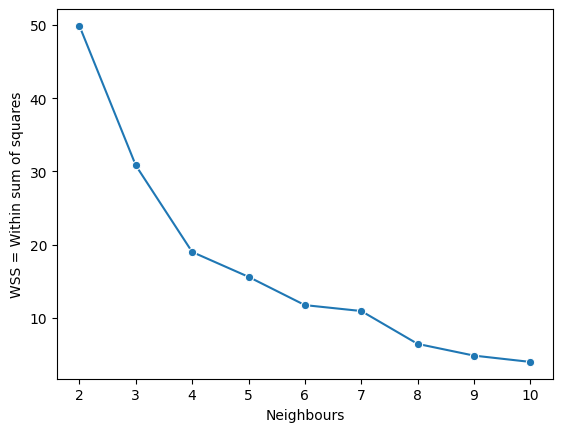

In [25]:
plt.xlabel('Neighbours')
plt.ylabel('WSS = Within sum of squares')
sns.lineplot(data = inertia, x='neigh', y='inertia', marker='o')
plt.show()